In [1]:
from keras import models

Using TensorFlow backend.


In [2]:
model = models.load_model( "cats_and_dogs_small_1.h5" )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [3]:
# Load image
from keras.preprocessing import image
img = image.load_img( "eddie1.jpg", target_size=(150,150) )
#img = image.load_img( "IMG_0699.jpeg", target_size=(150,150) )

In [4]:
# Convert to correct format tensor
import numpy as np

img_tensor = image.img_to_array( img )
img_tensor = np.expand_dims( img_tensor, axis=0 )
img_tensor /= 255
img_tensor.shape

(1, 150, 150, 3)

In [5]:
# Predict class
# pred = model.predict_classes( img_tensor )
# print( f"Prediction: {pred}" )

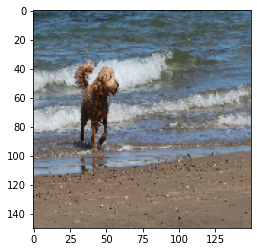

In [6]:
# Show original
import matplotlib.pyplot as plt

plt.imshow( img_tensor[0] )
plt.show()

In [7]:
layer_outputs = [layer.output for layer in model.layers[:8:2]]
activation_model = models.Model( inputs=model.input, outputs=layer_outputs )

activations = activation_model.predict( img_tensor )
first_layer_activation = activations[0]
print( first_layer_activation.shape )

(1, 148, 148, 32)


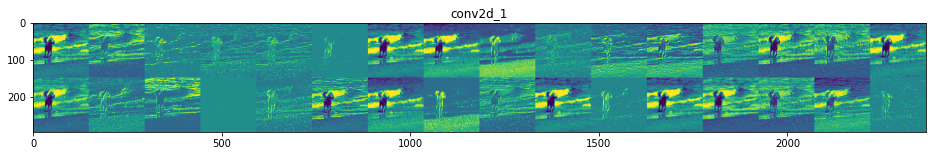

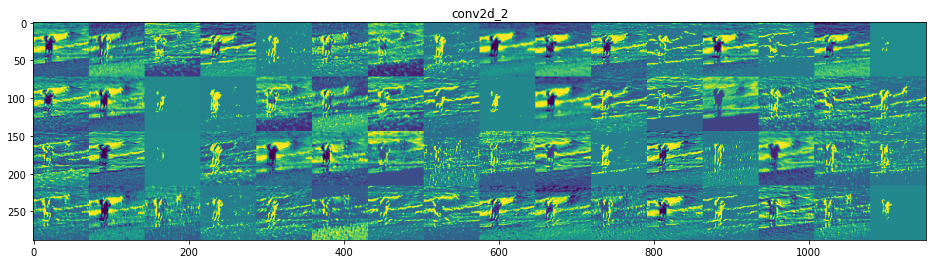

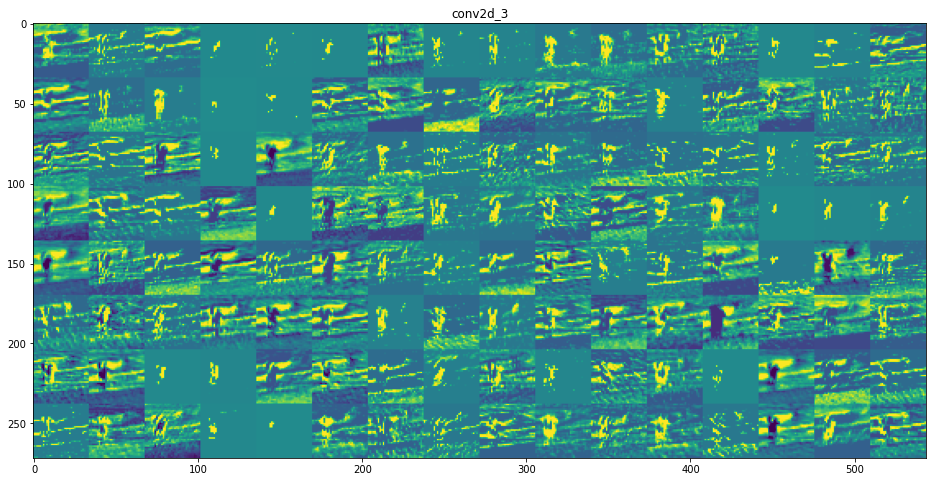

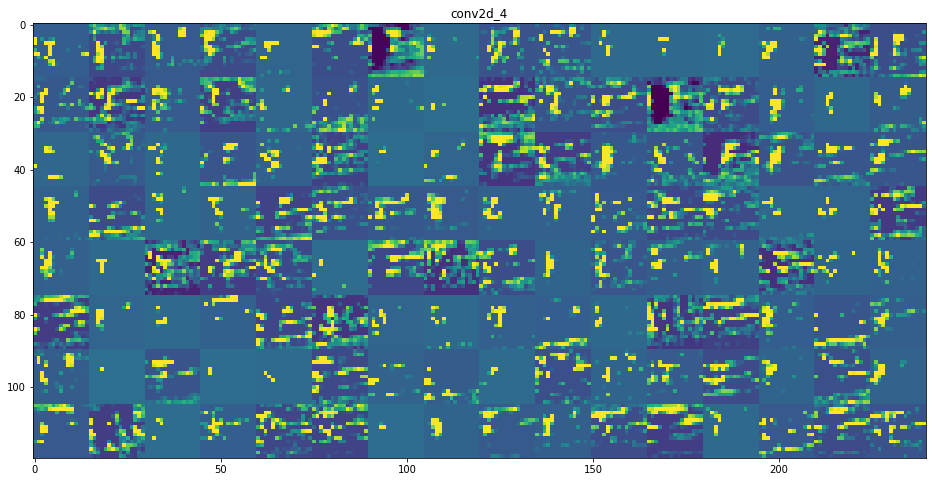

In [8]:
layer_names = []
for layer in model.layers[:8:2]:
    layer_names.append( layer.name )
    
images_per_row = 16

for layer_name, layer_activation in zip( layer_names, activations ):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros( (size * n_cols, images_per_row * size) )
    
    for col in range( n_cols ):
        for row in range( images_per_row ):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip( channel_image, 0, 255 ).astype( 'uint8' )
            display_grid[ col * size : (col + 1) * size,
                          row * size : (row + 1) * size ] = channel_image
    
    scale = 1. / size
    plt.figure( figsize=(scale * display_grid.shape[1],
                         scale * display_grid.shape[0]) )
    plt.title( layer_name )
    plt.grid( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )